In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
import math
import cv2
import time

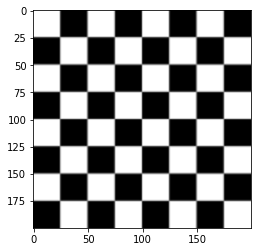

In [50]:
img = data.checkerboard()
plt.imshow(img, cmap = 'gray')

In [51]:
img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_LINEAR)

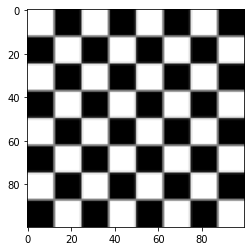

In [52]:
plt.imshow(img, cmap = 'gray')

In [99]:
img.shape

(100, 100)

### dft2d function

In [120]:
def dft2d(arr):
    
    N = arr.shape[0]
    omega = complex(math.cos(-2 * np.pi / N), math.sin(-2 * np.pi / N))
    
    
    dft2d_kernel = np.array([[omega ** (i * j) for j in range(0, N)] for i in range(0, N)])
    
    dft_img = dft2d_kernel @ arr @ dft2d_kernel
    
    return dft_img

In [101]:
start = time.time()
dft_img = dft2d(img)
end = time.time()
time_elapsed_dft = end - start

In [102]:
time_elapsed_dft

0.01222085952758789

In [103]:
start = time.time()
fft_img = np.fft.fft2(img)
end = time.time()
time_elapsed_fft = end - start

In [104]:
time_elapsed_fft

0.0010099411010742188

### Execution Times

**Time Elapsed with dft2d(img) : 0.012220 seconds**  
**Time Elapsed with np.fft.fft2(img) : 0.001009 seconds**

The time required to compute the Discrete Fourier Transform using np.fft.fft2(img) takes 1/10th of the time required to compute the same using dft2d(img). 

This is because np.fft.fft2 using a divide conquer approach to compute the DFT. The algorithm, starting from the original image, divides it into two halves recursively and computes DFT on each half in parallel and combines the results in the conquer phase.

The number of complex multiplications required in naive DFT is bounded by O(N^2) for an NxN image whereas with FFT the bound is of the order of O(Nlog(N)). FFT requires only log(N) stages which results in significantly fewer computations for large values of N.

 # --------------------------------------------------------------------------------------------------------------
### Q) Complete the function dft_ift which, in order,

**(1) Calls the dft2d function with the image to compute the discrete Fourier transform (DFT) F(u, v) (shifted such that the zero‑frequency component F(0, 0) is centered) of the input image f(x, y)**  
**(2) Calculates the magnitude ∥F(u, v)∥  and phase ϕ(u, v) of F(u, v)**  
**(3) Calculates the DFT G(u, v) = ∥F(u, v)∥ejϕ(u,v)**  
**(4) Computes the inverse discrete Fourier transform (IDFT)  g(x, y) of G(u, v) (after inverting the centering shift)**  
**(5) Returns the real part of g(x,y), magnitude ∥F(u, v)∥ and phase ϕ(u, v) of F(u, v)**  
**Note: You may use Python built‑in functions to perform the intermediate steps.**

In [131]:
def dft_ift(img):
    
    N = img.shape[0]
    F = dft2d(img)
    F_shifted = np.fft.fftshift(dft_img)
    
    F_mag = np.abs(F_shifted)
    F_phase = np.angle(F_shifted)
    
    G = F_mag * np.exp(1j * F_phase)
    G_shifted = np.fft.ifftshift(G)
    g = np.fft.ifft2(G_shifted)
    
    return g.real, F_mag, F_phase
    
    
    

#### Original Image

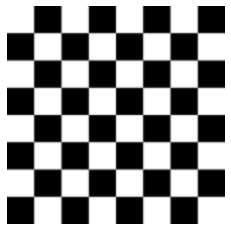

In [504]:
img = data.checkerboard()
plt.axis('off')
plt.imshow(img, cmap = 'gray')

In [505]:
g_real, F_mag, F_phase = dft_ift(img)

Text(0.5, 1.0, 'Real part of g')

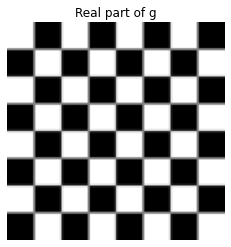

In [506]:
plt.axis('off')
plt.imshow(g_real, cmap = 'gray')
plt.title('Real part of g')

Text(0.5, 1.0, 'Magnitude of F(u, v) -> ||F(u, v)||')

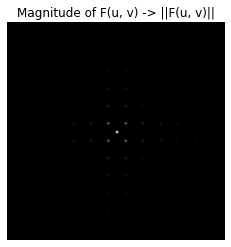

In [507]:
plt.axis('off')
plt.imshow(F_mag, cmap = 'gray')
plt.title('Magnitude of F(u, v) -> ||F(u, v)||')

Text(0.5, 1.0, 'Logarithm of Magnitude of F(u, v) -> log(||F(u, v)||)')

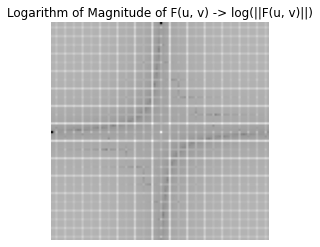

In [508]:
plt.axis('off')
plt.imshow(np.log(F_mag), cmap = 'gray')
plt.title('Logarithm of Magnitude of F(u, v) -> log(||F(u, v)||)')

Text(0.5, 1.0, 'Phase ϕ(u, v)')

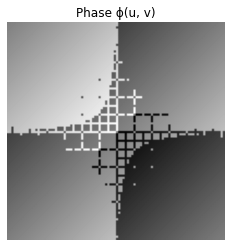

In [509]:
plt.axis('off')
plt.imshow(F_phase, cmap = 'gray')
plt.title('Phase ϕ(u, v)')

### Q)  What are the row and column indices of the component before and after the centering shift? your answer here

For a 200x200 image, the indices of component before the centering shift is (0, 0)
After the centering shift, the indices of the component are (100, 100) i.e. row = 100, col = 100 (0-indexed)

## FILTERING IN FREQUENCY DOMAIN

In [377]:
def filter_in_frequency_domain(img, kernel):

    padded_kernel = np.zeros_like(img, dtype = img.dtype)
    kernel = kernel[::-1, ::-1]
    padded_kernel[:kernel.shape[0], :kernel.shape[1]] = kernel
    
                
    dft_img = np.fft.fft2(img)
    dft_kernel = np.fft.fft2(padded_kernel)
    mul = dft_img * dft_kernel
    
    return np.fft.ifft2(mul).real
#     return np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(mul))).real
    
        

In [378]:
def conv_theorem(img, kernel):
    
    # Spatial Domain Filtering
    spatial_domain_filtered_img = cv2.filter2D(img, -1, kernel)
    
    # Frequency Domain Filtering
    frequency_domain_filtered_img = filter_in_frequency_domain(img, kernel)
    
    return spatial_domain_filtered_img, frequency_domain_filtered_img

In [379]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]).astype(np.float64)

Text(0.5, 1.0, 'Original Image')

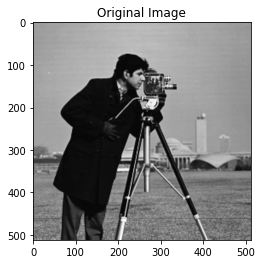

In [380]:
img = data.camera()
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

In [381]:
spatial_filtered_img, freq_filtered_img =  conv_theorem(img, kernel)

Text(0.5, 1.0, 'Frequency Domain Filtered Image')

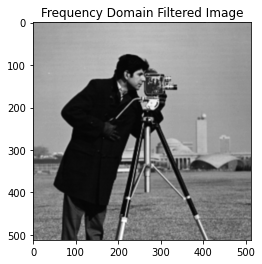

In [382]:
plt.imshow(freq_filtered_img, cmap = 'gray')
plt.title('Frequency Domain Filtered Image')

Text(0.5, 1.0, 'Spatial Domain Filtered Image')

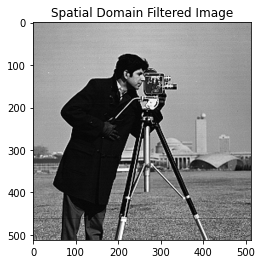

In [383]:
plt.imshow(spatial_filtered_img, cmap = 'gray')
plt.title('Spatial Domain Filtered Image')

Text(0.5, 1.0, 'Sharpened Image')

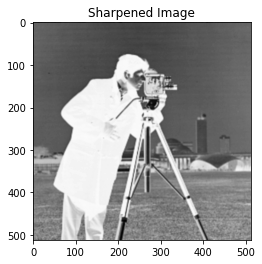

In [384]:
sharpened_img = img - freq_filtered_img
plt.imshow(sharpened_img, cmap = 'gray')
plt.title('Sharpened Image')

### Briefly discuss your results. Why would it be beneficial to implement filtering in the frequency domain? (Optional: subtract a filtered image from the input image to yield a sharpened image.)

**Results:**
The results of applying the filter on the image in the frequency domain and in the spatial domain are identical.
In both cases, the resulting image is a sharpened version of the original image.

Benefits of performing filtering in frequency domain:
- Filtering in the frequency domain involves performing the convolution operation by multiplying the Fourier transforms of the image and the kernel and then taking the inverse Fourier transform of the result.
- This approach offers the benefit of reduced computational complexity compared to spatial domain convolution, especially for large kernel sizes as the number of multiplications is reduced by a factor of almost 20.
- By leveraging FFT, filtering in the frequency domain avoids spatial domain limitations such as boundary effects and wraparound errors.

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

**1. Complete the function ideal_lpf that applies an ideal low pass filter in the frequency domain. The function inputs are an image and a radius, and the function output is the image with ideal low‑pass filter applied in the frequency domain.**  
**2. Complete the function gaussian_lpf that applies a Gaussian low pass filter in the frequency domain. The function inputs are an image and a variance, and the function output is the image with Gaussian low‑pass filter applied in the frequency domain.**  
**3. Call the function ideal_lpf with the camera image and for three different radii. One of the function call must have radius D0 = 50 . Display the original image and all three ideal low pass filtered images and briefly discuss your results.**  
**4. Call the function gaussian_lpf with the camera image and for three different standard deviations (). Display the original image and all three Gaussian low pass filtered images. Briefly discuss the difference between your Gaussian low pass filtering results and your ideal low pass filtering results.**


In [482]:
def ideal_lpf(img, radius):
    lpf = np.zeros_like(img)
    
    x_c = 0
    y_c = 0
    distance = lambda x, y : np.sqrt((x - x_c)**2 + (y - y_c)**2)
    
    for x in range(lpf.shape[0]):
        for y in range(lpf.shape[1]):
            lpf[x][y] = 1 if distance(x, y) < radius else 0

    return filter_in_frequency_domain(img, lpf)


def gaussian_lpf(img, std):
    x_c = 0
    y_c = 0
    distance = lambda x, y : np.sqrt((x - x_c) ** 2 + (y - y_c) ** 2)
    
    lpf = np.zeros_like(img)
    
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            lpf[x][y] = -(distance(x, y) ** 2) / (2 * std ** 2)
            
            
    lpf = np.exp(lpf)
    return filter_in_frequency_domain(img, lpf)
    
    

## Ideal Low Pass Filtering

Text(0.5, 1.0, 'Original Image')

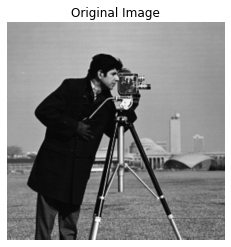

In [486]:
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

Text(0.5, 1.0, 'Ideal Low Pass Filtered Image, radius D0 = 30')

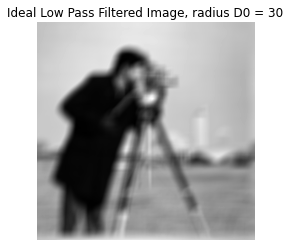

In [483]:
lpf_img = ideal_lpf(img, 25)
plt.axis('off')
plt.imshow(lpf_img, cmap = 'gray')
plt.title('Ideal Low Pass Filtered Image, radius D0 = 30')

Text(0.5, 1.0, 'Ideal Low Pass Filtered Image, radius D0 = 40')

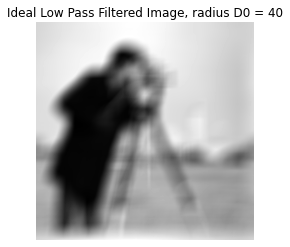

In [484]:
lpf_img = ideal_lpf(img, 40)
plt.axis('off')
plt.imshow(lpf_img, cmap = 'gray')
plt.title('Ideal Low Pass Filtered Image, radius D0 = 40')

Text(0.5, 1.0, 'Ideal Low Pass Filtered Image, radius D0 = 50')

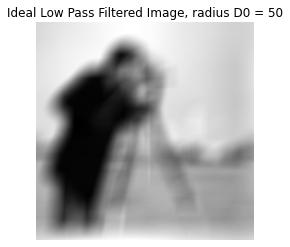

In [485]:
lpf_img = ideal_lpf(img, 50)
plt.axis('off')
plt.imshow(lpf_img, cmap = 'gray')
plt.title('Ideal Low Pass Filtered Image, radius D0 = 50')

### Results of performing ideal low pass filtering on the camera image using different radii.

The extent of blurring increases with radii D. This is because with increase in D, a larger neighborhood of the image is taken into consideration while performing filtering operation and the result of applying the low pass filter is equivalent to replacing the pixel value with its neighborhood average.

## Gaussian Low Pass Filtering

Text(0.5, 1.0, 'Original Image')

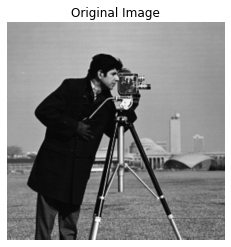

In [487]:
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')

C:\Users\Rohit\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


Text(0.5, 1.0, 'Gaussian Low Pass Filtered Image, std = 40')

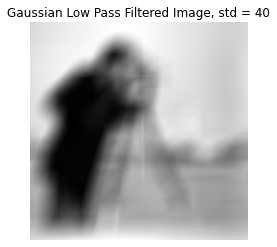

In [500]:
gaussian_lpf_img = gaussian_lpf(img, 40)
plt.axis('off')
plt.imshow(gaussian_lpf_img, cmap = 'gray')
plt.title('Gaussian Low Pass Filtered Image, std = 40')

C:\Users\Rohit\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


Text(0.5, 1.0, 'Gaussian Low Pass Filtered Image, std = 50')

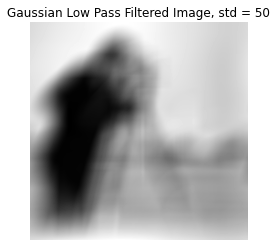

In [501]:
gaussian_lpf_img = gaussian_lpf(img, 50)
plt.axis('off')
plt.imshow(gaussian_lpf_img, cmap = 'gray')
plt.title('Gaussian Low Pass Filtered Image, std = 50')

C:\Users\Rohit\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


Text(0.5, 1.0, 'Gaussian Low Pass Filtered Image, std = 70')

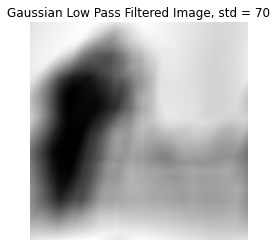

In [502]:
gaussian_lpf_img = gaussian_lpf(img, 70)
plt.axis('off')
plt.imshow(gaussian_lpf_img, cmap = 'gray')
plt.title('Gaussian Low Pass Filtered Image, std = 70')

## Differences between Gaussian low pass filtering results and ideal low pass filtering results.

**Ideal Low Pass Filtering**
- The ideal low-pass filter completely preserves all frequencies within a specified radius (cutoff frequency) and completely attenuates all frequencies outside this radius. This results in a sharp cutoff in the frequency domain, leading to ringing artifacts in the spatial domain.
- The transition between preserved and attenuated frequencies is abrupt, resulting in a sharper cutoff.
- The sharp cutoff of the ideal filter can lead to ringing artifacts around edges, where there is a sudden transition from preserved to attenuated frequencies.

**Gaussian Low Pass Filtering**
- The Gaussian filter attenuates high-frequency components smoothly with increasing distance from the center, following a Gaussian distribution. It does not abruptly cut off high frequencies but gradually reduces their amplitudes.
- The transition between preserved and attenuated frequencies is gradual and smooth, leading to a softening effect on the image edges.
- While the Gaussian filter provides a smoother transition, it can introduce blurring artifacts (std = 70 case), especially if the standard deviation of the Gaussian kernel is too high.